# O objetivo deste notebook é carregar o dataset sobre risco de crédito, cujo link encontra-se abaixo e tratar os dados inconsistentes, ausentes e também outliers.


link do dataset: https://www.kaggle.com/laotse/credit-risk-dataset?select=credit_risk_dataset.csv


## Descrição das colunas :


person_age: idade da pesoa quando pegou o empréstimo.

person_income: renda por ano.

person_home_ownership: tipo de propriedade da casa.

person_emp_length: quantidade de tempo em anos que a pessoa está empregada.

loan_intent: objetivo do emprestimo.

loan_grade: é um sistema de classificação que envolve a atribuição de uma pontuação de qualidade a um empréstimo com base no histórico de crédito do mutuário, qualidade da caução e probabilidade de reembolso do principal e juros.

loan_amnt:valor do empréstimo.

loan_int_rate: o juros pago pelo empréstimo.

loan_status: status de risco do empréstimo.

loan_percent_income: relação entre o valor do empréstimo e a receita anual.

cb_person_default_on_file: histórico de inadimplência.

cb_person_cred_hist_length: representa o número de anos de história pessoal desde o primeiro empréstimo tomado por uma pessoa.

# Transformando dados

- Carregando as biblitotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  carregando os dados 
url = 'https://raw.githubusercontent.com/robertferro/analisando_risco_credito/main/1-%20Tratamento%20de%20dados%20(ETL)/credit_risk_dataset.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


- Como pode ser observado, o dataset trás informações referentes as operações de crédito, tais como idade de quem solicitou empréstimo, renda, motivo do empréstimo, quantidade de anos que a pessoa está empregada, se possui histórico de inadimplência, taxa de juros aplicada, valor do crédito e se o emprestimo é considerado de risco ou não.

- Abaixo será relizado duas transformações no dataset, sendo elas: renomear e reoordenar as colunas, para facilitar o trabalhos com os dados.


In [4]:
# renomeando as colunas
df.columns = [ 'idade','renda_por_ano','tipo_moradia','tempo_de_emprego','objetivo_emprestimo',
               'class_risco_historico','montante_emprestimo','taxa_juros','risco_emprestimo',
               'porc_empr_renda_anual','inadimplencia_hist','qtd_anos_primeiro_emprestimo']

#  reoordenando as colunas
df = df[['idade','tempo_de_emprego','tipo_moradia',
         'objetivo_emprestimo','montante_emprestimo','taxa_juros',
         'renda_por_ano','porc_empr_renda_anual','class_risco_historico','inadimplencia_hist',
         'qtd_anos_primeiro_emprestimo','risco_emprestimo']]

# exibindo o dataset após as transformações
df.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
0,22,123.0,RENT,PERSONAL,35000,16.02,59000,0.59,D,Y,3,1
1,21,5.0,OWN,EDUCATION,1000,11.14,9600,0.10,B,N,2,0
2,25,1.0,MORTGAGE,MEDICAL,5500,12.87,9600,0.57,C,N,3,1
3,23,4.0,RENT,MEDICAL,35000,15.23,65500,0.53,C,N,2,1
4,24,8.0,RENT,MEDICAL,35000,14.27,54400,0.55,C,Y,4,1


- Tratando os dados das colunas **objetivo_emprestimo**,**tipo_moradia** e **inadimplencia_hist**

Os dados das 2 primeiras colunas citadas acima serão traduzidos criado um dicionário e aplicando a função map, para que as colunas agora passem a ter os valores especificados no dicionário, esta transformação é necessária para melhor compreensão dos dados.
 

 
 Já os dados da coluna inadimplencia_hist, irei utilizar a função apply e lambda para alterar os valores de correspondentes a "Y" que corresponde a sim como sendo igual a 1, e os valores correspondentes a "N" serão alterados para 0, uma transformação que será útil quando for modelar os dados.

In [5]:
objetivo = {'EDUCATION': "educacao", 'MEDICAL': "saude", 'VENTURE': "risco", 
            'PERSONAL': "pessoal", 'DEBTCONSOLIDATION': "consolidacao_debito" ,'HOMEIMPROVEMENT':'reformar_casa'}
df['objetivo_emprestimo'] = df['objetivo_emprestimo'].map(objetivo)


tipo_moradia = {'RENT': 'alugada', 'MORTGAGE': 'hipoteca', 'OWN': 'propria', 'OTHER': 'outro'  }
df['tipo_moradia'] = df['tipo_moradia'].map(tipo_moradia)


df['inadimplencia_hist'] = df['inadimplencia_hist'].apply(lambda x:  1 if x =='Y' else 0)

In [6]:
df.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
0,22,123.0,alugada,pessoal,35000,16.02,59000,0.59,D,1,3,1
1,21,5.0,propria,educacao,1000,11.14,9600,0.10,B,0,2,0
2,25,1.0,hipoteca,saude,5500,12.87,9600,0.57,C,0,3,1
3,23,4.0,alugada,saude,35000,15.23,65500,0.53,C,0,2,1
4,24,8.0,alugada,saude,35000,14.27,54400,0.55,C,1,4,1


# Tratando os dados ausentes, incosistentes e outliers.

- Verificando dados ausentes e inconsistentes.


In [7]:
df.isna().sum()

idade                              0
tempo_de_emprego                 895
tipo_moradia                       0
objetivo_emprestimo                0
montante_emprestimo                0
taxa_juros                      3116
renda_por_ano                      0
porc_empr_renda_anual              0
class_risco_historico              0
inadimplencia_hist                 0
qtd_anos_primeiro_emprestimo       0
risco_emprestimo                   0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
tempo_de_emprego,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
montante_emprestimo,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
taxa_juros,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
renda_por_ano,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
porc_empr_renda_anual,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
inadimplencia_hist,32581.0,0.176330,0.381106,0.00,0.00,0.00,0.00,1.00
qtd_anos_primeiro_emprestimo,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00
risco_emprestimo,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00


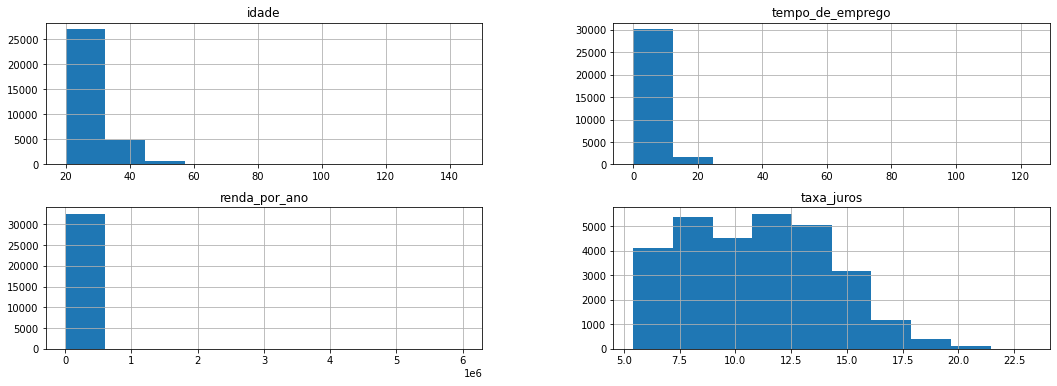

In [9]:
df[['idade','tempo_de_emprego','renda_por_ano','taxa_juros']].hist(figsize=(18,6));

Após analisar os dados usando a função describe do pandas e histograma de algumas variáveis podemos chegar a alguma conclusões sobre os dados.

Analisando as informações acima podemos verificar que há uma inconsistência na coluna **tempo de emprego**, onde 75% dos registros encontram-se entre 0 e 7 anos, e após isso 25% está entre 7 e 123 anos, o que indica a presença de *outliers*.


Analisando a variável **idade** que possui 75% dos registros entre 20 e 30 anos e 25% deles entre 30 e 144 anos, que indica a presença de dados que podem ter sido lançados de forma errada e também a presença de outliers.

A mesma análise acima pode ser aplicada para a variável **renda por ano** que possui 75% dos registros entre 61983.119168 e 79200.00 e 25% deles entre 79200.00 e 6000000, que indica a presença de dados que podem ter sido lançados de forma errada e também a presença de outliers.



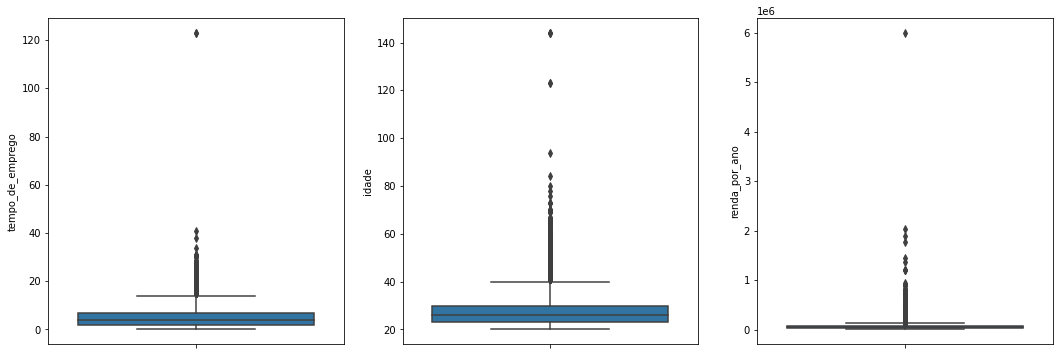

In [10]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

sns.boxplot(y=df['tempo_de_emprego'],ax=ax[0]);
sns.boxplot(y=df['idade'],ax=ax[1]);
sns.boxplot(y=df['renda_por_ano'],ax=ax[2]);

Tratando a variável **tempo de emprego**

Como pode ser observado, para a variável tempo de emprego, registros um pouco abaixo de 17 anos já podem ser considerados como *outliers* e para esse conjunto e dados será estabelecido um filtro de no máximo 20 anos de tempo de emprego, para reduzir a presença de outliers


Criando um filtro e excluindo os registros.

In [11]:
df = df.copy()
df = df[df['tempo_de_emprego']<=20]

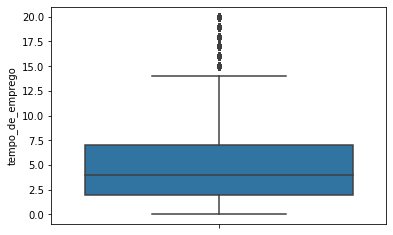

In [12]:
sns.boxplot(y=df['tempo_de_emprego']);

Tratando a variável **Idade**

Como pode ser observado, para a variável idade, registros um pouco abaixo de 40 anos já podem ser considerados como *outliers*, mas para esse conjunto de dados será estabalecido um filtro de no máximo 50 anos.


Criando um filtro e excluindo os registros.

In [13]:
df = df.copy()
df = df[df['idade']<=50]

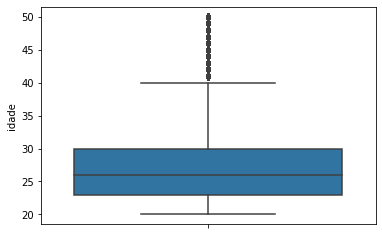

In [14]:
sns.boxplot(y=df['idade']);

Como pode ser observado a quatidade de ouliers diminuiu consideravelmente, assim como quando foi aplicado um filtro na variável tempo de emprego.

Tratando a variável **renda por ano**

Como ja foi observado, a variável renda por ano apresenta 75% dos seus registros entre 61983.119168 e 79200.00 e 25 % entre 79200.00 e 6000000, e será feito uma análise mais detalhada sobre isso.

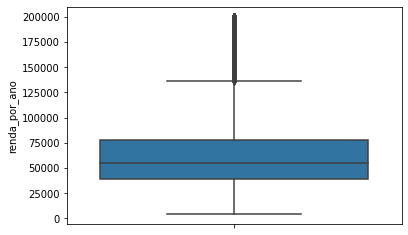

In [15]:
sns.boxplot(y=df[df['renda_por_ano']<=200000]['renda_por_ano'])

In [16]:
df[df['renda_por_ano']>150000].shape

(1091, 12)

Será estabelecido um filtro para a renda por ano de no máximo 200000, visto que com esse ponto de corte não serão perdidos muitos registros e que esse novo valor melhora a distribuição dos dados.

In [17]:
df = df[df['renda_por_ano'] <= 200000]

Tratando a variável **taxa de juros**

In [18]:
df.isnull().sum()

idade                              0
tempo_de_emprego                   0
tipo_moradia                       0
objetivo_emprestimo                0
montante_emprestimo                0
taxa_juros                      2975
renda_por_ano                      0
porc_empr_renda_anual              0
class_risco_historico              0
inadimplencia_hist                 0
qtd_anos_primeiro_emprestimo       0
risco_emprestimo                   0
dtype: int64

Os valores ausentes serão preenchidos com o valor médio da taxa de juros.

In [19]:
df['taxa_juros'] = df['taxa_juros'].fillna(df.taxa_juros.mean())

In [20]:
df.isnull().sum()

idade                           0
tempo_de_emprego                0
tipo_moradia                    0
objetivo_emprestimo             0
montante_emprestimo             0
taxa_juros                      0
renda_por_ano                   0
porc_empr_renda_anual           0
class_risco_historico           0
inadimplencia_hist              0
qtd_anos_primeiro_emprestimo    0
risco_emprestimo                0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30881 entries, 1 to 32296
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         30881 non-null  int64  
 1   tempo_de_emprego              30881 non-null  float64
 2   tipo_moradia                  30881 non-null  object 
 3   objetivo_emprestimo           30881 non-null  object 
 4   montante_emprestimo           30881 non-null  int64  
 5   taxa_juros                    30881 non-null  float64
 6   renda_por_ano                 30881 non-null  int64  
 7   porc_empr_renda_anual         30881 non-null  float64
 8   class_risco_historico         30881 non-null  object 
 9   inadimplencia_hist            30881 non-null  int64  
 10  qtd_anos_primeiro_emprestimo  30881 non-null  int64  
 11  risco_emprestimo              30881 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.1+ MB


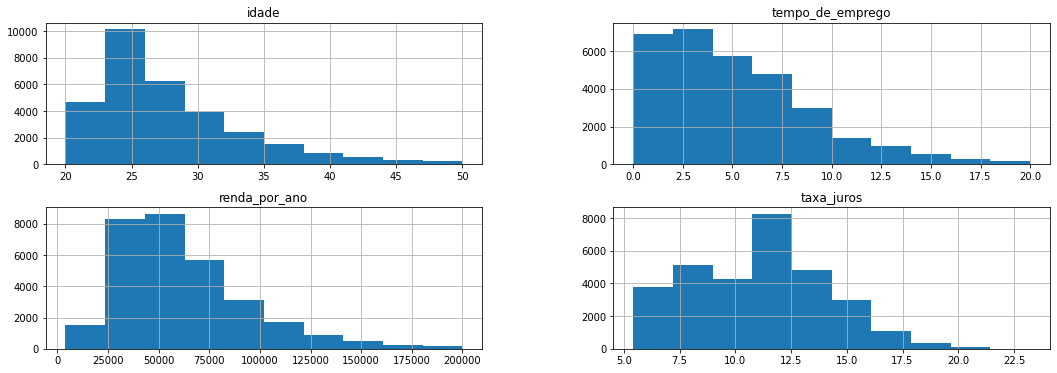

In [22]:
df[['idade','tempo_de_emprego','renda_por_ano','taxa_juros']].hist(figsize=(18,6));

Após o tratamento dos dados, pode ser observado uma mudança considerável nas distribuição dos mesmos.

# Transformando variáveis categóricas em variáveis numéricas.

Apos todas as transformações realizadas acima, ainda serão criadas novas colunas correspondentes a colunas já existentes que não possuem valor numérico.

Esta transformação já é feita visando a análise dos dados e também a modelagem.

Utilizando LabelEncoder da biblioteca sklearn, vou tratar variáveis categóricas, criando novas colunas com final id, para que não altere os registros originais do dataset.

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


df['tipo_moradia_id']  = encoder.fit_transform(df['tipo_moradia'])
df['objetivo_emprestimo_id']  = encoder.fit_transform(df['objetivo_emprestimo'])
df['class_risco_historico_id']  = encoder.fit_transform(df['class_risco_historico'])

In [24]:
# reoordenando as colunas
df = df[['idade', 'tempo_de_emprego', 'tipo_moradia','tipo_moradia_id', 
  'objetivo_emprestimo','objetivo_emprestimo_id',
  'montante_emprestimo', 'taxa_juros', 'renda_por_ano',
  'porc_empr_renda_anual', 'class_risco_historico',
  'class_risco_historico_id', 'inadimplencia_hist',
  'qtd_anos_primeiro_emprestimo', 'risco_emprestimo']]

df.head()

,idade,tempo_de_emprego,tipo_moradia,tipo_moradia_id,objetivo_emprestimo,objetivo_emprestimo_id,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,class_risco_historico_id,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
1,21,5.0,propria,3,educacao,1,1000,11.14,9600,0.10,B,1,0,2,0
2,25,1.0,hipoteca,1,saude,5,5500,12.87,9600,0.57,C,2,0,3,1
3,23,4.0,alugada,0,saude,5,35000,15.23,65500,0.53,C,2,0,2,1
4,24,8.0,alugada,0,saude,5,35000,14.27,54400,0.55,C,2,1,4,1
5,21,2.0,propria,3,risco,4,2500,7.14,9900,0.25,A,0,0,2,1


- Salvando os dados tratados em um arquivo csv.

In [25]:
df.to_csv('dados_analise_risco_de_cresdito.csv',index=False)